In [1]:
import pygmt
import numpy as np
import geostochpy
import rockhound as rh
from scipy.io import loadmat
from scipy.interpolate import griddata
file_trench=geostochpy.get_data('trench-chile.txt')
trench = np.genfromtxt( file_trench, delimiter = " " )
lonfosa = trench[:,0]
latfosa = trench[:,1]
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
##################################### LOAD SLIP #######################################################
version=9.0
folder=f'/home/alex/StochasticSlipGenerator/Output_data/Simulation_{version}_1000_coupling/'
imgfolder=f'/home/alex/StochasticSlipGenerator/Output_data/Simulation_{version}_1000_coupling/img_filtered/'
simulation=loadmat(folder+'simulations.mat',struct_as_record=False, squeeze_me=True)
simulation=simulation['simulations']


In [61]:
x = np.array(simulation[0].lon).flatten()
y = np.array(simulation[0].lat).flatten()
z = np.array(simulation[0].slip).flatten()
region_slip = [np.min(x)-1, np.max(x), np.min(y)-1, np.max(y)]
grid=pygmt.nearneighbor(x=x, y=y, z=z,region=region_slip,spacing="1k+en/1k+en",search_radius="35k")
delunay=pygmt.triangulate.regular_grid(x=x, y=y,z=z, region=region_slip, spacing="1k/1k")
# Usamos sphinterpolate en el grid de datos convertido
new_grid = pygmt.sph2grd(x=x, y=y,z=z, region=region_slip, spacing="1k/1k")

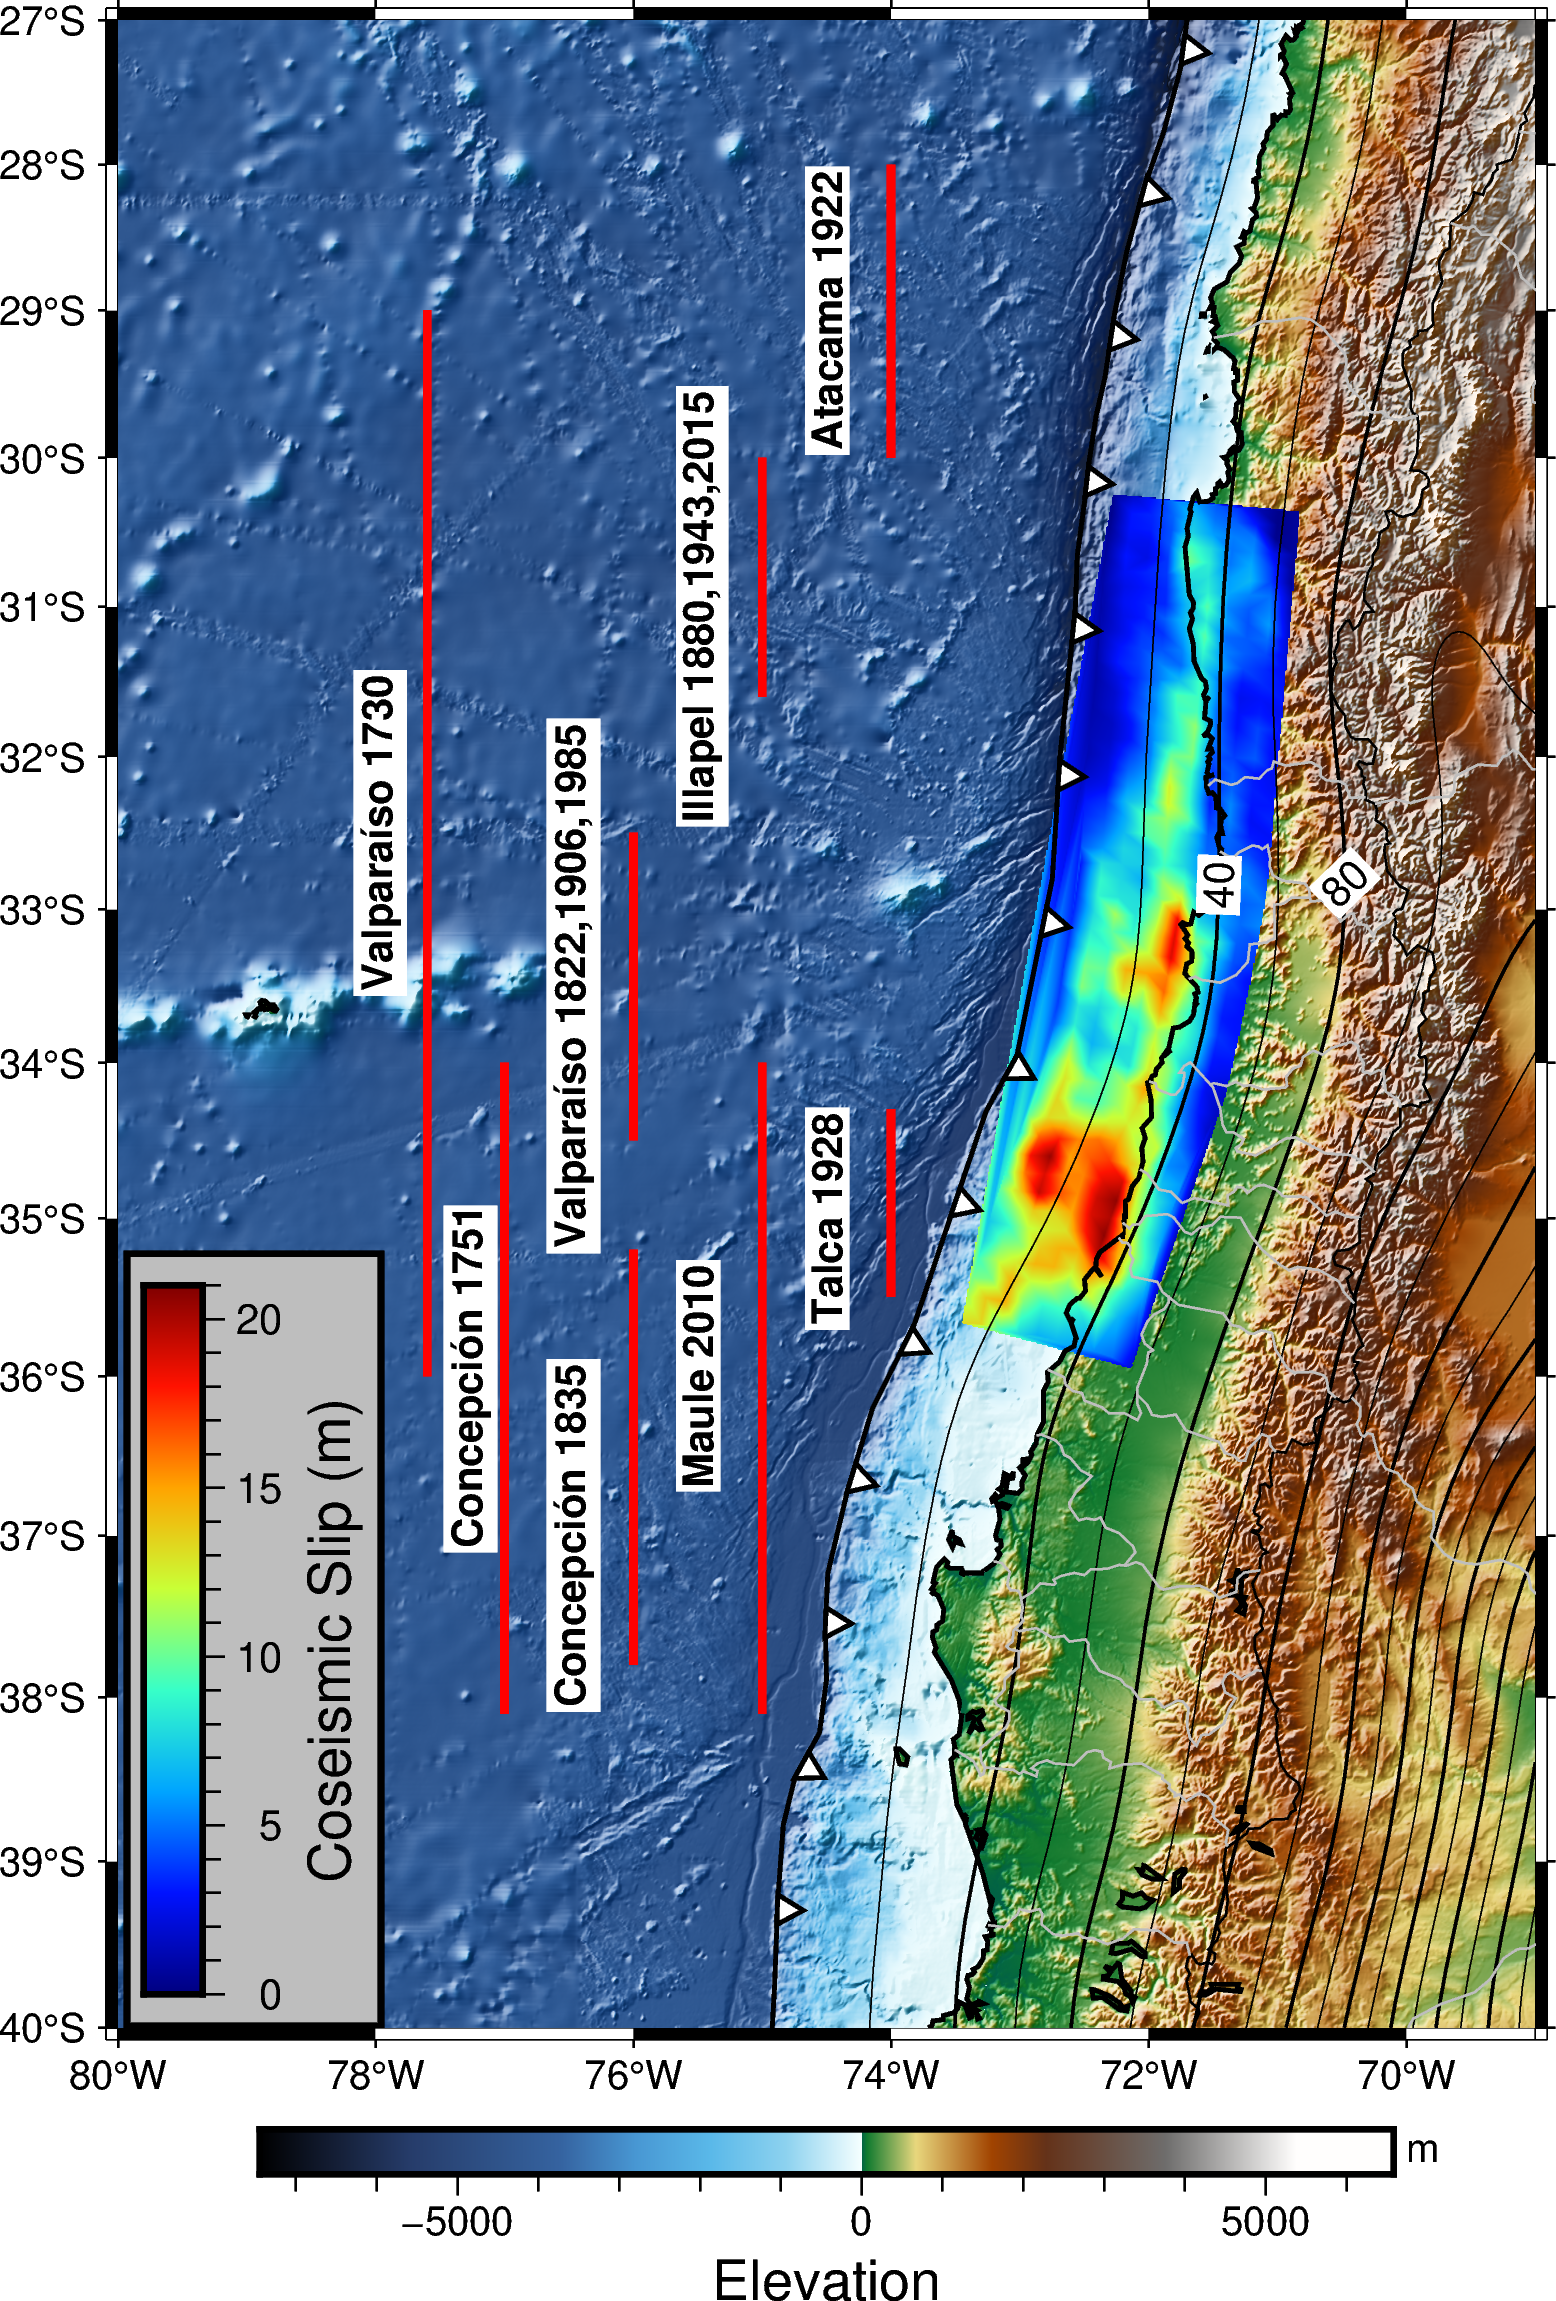

In [62]:

region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='geo',shading=True,dpi=300)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"])
cmap=pygmt.makecpt(cmap='jet',series=[0, np.max(np.round(z)), 3],continuous=True)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
events = [
    {"x": -77.6, "y_range": [-29, -36], "text_x": -78, "text_y": -32.5, "label": "Valparaíso 1730"},
    {"x": -77, "y_range": [-34, -38.1], "text_x": -77.3, "text_y": -36, "label": "Concepción 1751"},
    {"x": -76, "y_range": [-32.5, -34.5], "text_x": -76.5, "text_y": -33.5, "label": "Valparaíso 1822,1906,1985"},
    {"x": -75, "y_range": [-30, -31.6], "text_x": -75.5, "text_y": -31, "label": "Illapel 1880,1943,2015"},
    {"x": -74, "y_range": [-34.3, -35.5], "text_x": -74.5, "text_y": -35, "label": "Talca 1928"},
    {"x": -74, "y_range": [-28, -30], "text_x": -74.5, "text_y": -29, "label": "Atacama 1922"},
    {"x": -75, "y_range": [-34, -38.1], "text_x": -75.5, "text_y": -36, "label": "Maule 2010"},
    {"x": -76, "y_range": [-35.2, -37.8], "text_x": -76.5, "text_y": -37, "label": "Concepción 1835"}
]

for event in events:
    fig.plot(x=[event["x"], event["x"]], y=event["y_range"], fill='red', pen='2,red')
    fig.text(x=event["text_x"], y=event["text_y"], text=event["label"], fill='white', font="10p,Helvetica-Bold,black", angle=90)

##
fig.grdimage(grid=delunay,cmap=cmap,nan_transparent=True,dpi=300,shading=False)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,levels=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="1p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lCoseismic Slip (m)"],
)
fig.show()
fig.savefig('simulation_0001.png',anti_alias=True,dpi=300)

In [49]:
fig = pygmt.Figure()
fig.grdview(grid=earth_grid,
           region=region,
           surftype='s',
           projection='M12c',
           perspective=[150,45],
           zsize='4c',
           frame=['xa5f1','ya5f1','z5000+lmeters','wSEnZ'],shading='+a50+nt1')
fig.show()
